In [2]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [3]:
ORIGINAL_IMAGE_PATH = "./data/sample.png"
RESULTS_DIR = "./results/"

(890, 632, 4)
(890, 632, 3)


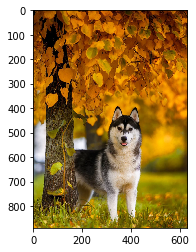

In [54]:
original = imread(ORIGINAL_IMAGE_PATH)
original = np.array(original)
print(original.shape)
plt.imshow(original)
rbg_image = np.delete(original,3,2)
print(rbg_image.shape)

In [56]:
n = 64 #32
nH = int(rbg_image.shape[0]/n)
nW = int(rbg_image.shape[1]/n)
print((nW, nH))

(9, 13)


In [ ]:
import 